In [1]:
!rm -rf ./experiments
%config InlineBackend.figure_format = 'svg'

# Controllers

Controllers allow for the automated running of experiments. For a selection of available Controllers, and how to implement your own, see the [controllers documentation](controllers-api.rst).

In [1]:
from math import log

from digital_experiments import experiment
from digital_experiments.controllers import GridSearch


def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 -7)**2

@experiment
def objective(x, y):
    return log(himmelblau(x, y) + 10)

# we want to over x and y in the range -5 to 5
grid = GridSearch(x=range(-5, 6), y=range(-5, 6))

# automatically run the experiment
# we have a total of 11*11=121 experiments
grid.control(objective, n=11**2)
observations = objective.observations()
len(observations)

121

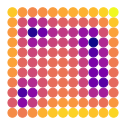

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2, 2))
plt.scatter(
    [obs.config["x"] for obs in observations],
    [obs.config["y"] for obs in observations],
    c=[obs.result for obs in observations],
    s=80,
    cmap="plasma",
)
plt.axis("off");